In [4]:
import sys
sys.path.insert(0, '../src')

"""
Utils
"""
from termcolor import colored
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


"""
Modules principaux
"""
from Sequentiel import Sequentiel
from Optim import SGD
from Linear import Linear
"""
Activation
"""
from activation.Softmax import Softmax
from activation.Sigmoide import Sigmoide
from activation.TanH import TanH
"""
Loss
"""
from loss.MSELoss import MSELoss
from loss.CELoss import CELoss



In [5]:
class DataGenerator : 
    
    def classif_data(self,n_clusters_per_class=1,n_informative=2,n_samples=100,n_classes=2) : 
        return make_classification(n_classes = n_classes,n_features=2, n_samples=n_samples,n_redundant=0, n_informative=n_informative, n_clusters_per_class=n_clusters_per_class)

def print_ok():
    print(colored('OK','green'))

def print_ko():
    print(colored('KO','red'))


def onehot_to_vector(y):
    res = []
    for i in range(y.shape[0]):
        res.append(np.argmax(y[i]))
    res = np.array(res)
    return res.reshape((-1,1))

def onehot(y):
    onehot = np.zeros((y.size, y.max() + 1))
    onehot[np.arange(y.size), y] = 1
    return onehot

In [7]:
## TEST SUR MNIST

np.random.seed(0)

# Création donnée : mnist
nom_fichier_train =  "data/mnist_train.csv"
nom_fichier_test =  "data/mnist_test.csv"
data_train =  pd.read_csv(nom_fichier_train).to_numpy()
data_test =  pd.read_csv(nom_fichier_test).to_numpy()
X_train,y_train = data_train[:,1:].astype('float32') , data_train[:,0]
X_test, y_test = data_test[:,1:].astype('float32') , data_test[:,0]
X_train /= 255
X_test /= 255
y_train = onehot(y_train)


print("taille du dataset : ",X_train.shape)

print(X_train.shape)

linear1 = Linear(X_train.shape[1], 256)
activation1 = TanH()
linear2 = Linear(256, 128)
activation2 = TanH()
linear3 = Linear(128, y_train.shape[1])
activation3 = Softmax()
loss = CELoss()


taille du dataset :  (60000, 784)
(60000, 784)


In [8]:
# Optimization

# Hyperparameters
maxIter = 50
eps = 1e-2
batch_size = 1000

model = Sequentiel(linear1, activation1, linear2, activation2, linear3, activation3)

optimizer = SGD(model, loss, X_train, y_train, batch_size=batch_size, eps=eps, nbIter=maxIter)
list_loss = optimizer.update()

taux_train = ((np.argmax( optimizer.net.forward(X_train),axis = 1) == onehot_to_vector(y_train)).mean()*100)
taux_test = ((np.argmax( optimizer.net.forward(X_test),axis = 1) == y_test).mean()*100)
print("Taux de bonne classification en train : ",taux_train,"%")
print("Taux de bonne classification en test : ",taux_test,"%")

100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


Taux de bonne classification en train :  9.751666666666667 %
Taux de bonne classification en test :  9.74 %


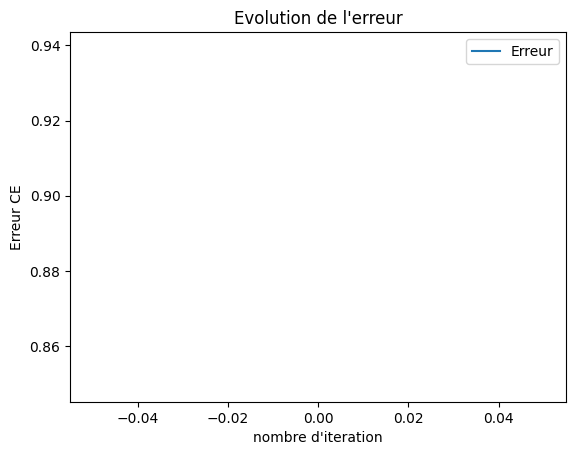

In [9]:
"""
AFFICHAGE DE LA LOSS
"""

plt.figure()
plt.xlabel("nombre d'iteration")
plt.ylabel("Erreur CE")
plt.title("Evolution de l'erreur")
plt.plot(list_loss,label="Erreur")
plt.legend()
plt.show()

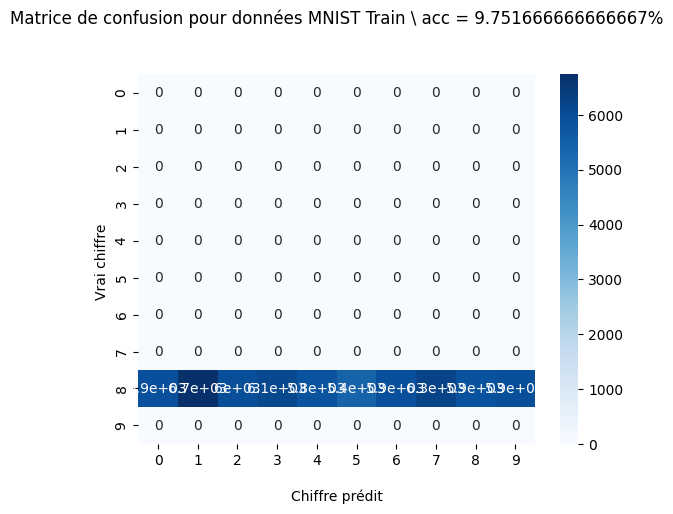

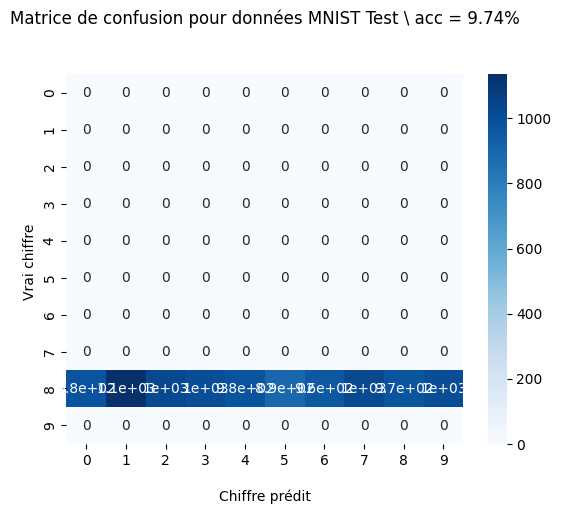

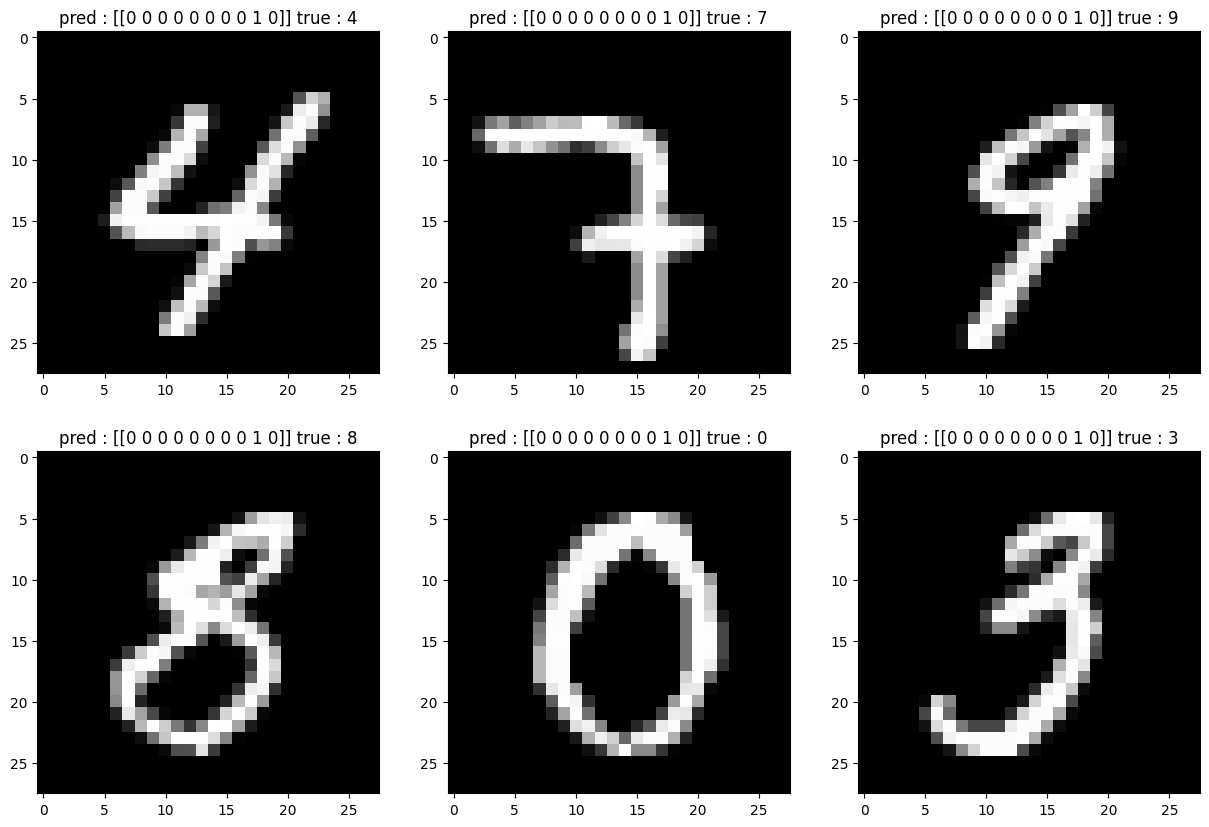

In [10]:
"""
MATRICE DE CONFUSION
"""

predict = model.forward(X_train)
predict = np.argmax(predict, axis=1)
plt.figure()
confusion = confusion_matrix(predict, onehot_to_vector(y_train))
ax = sns.heatmap(confusion, annot=True, cmap='Blues')
ax.set_title(f"Matrice de confusion pour données MNIST Train \ acc = {taux_train}%\n\n")
ax.set_xlabel('\nChiffre prédit')
ax.set_ylabel('Vrai chiffre ')
ax.xaxis.set_ticklabels(np.arange(10))
ax.yaxis.set_ticklabels(np.arange(10))
plt.show()

predict = model.forward(X_test)
predict = np.argmax(predict, axis=1)

plt.figure()
confusion = confusion_matrix(predict, y_test)

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(f"Matrice de confusion pour données MNIST Test \ acc = {taux_test}%\n\n")
ax.set_xlabel('\nChiffre prédit')
ax.set_ylabel('Vrai chiffre ')

ax.xaxis.set_ticklabels(np.arange(10))
ax.yaxis.set_ticklabels(np.arange(10))

plt.show()

def affiche_prediction(X_test,y_test,net,nb_pred=6,n=16):
    random_ind = np.random.choice(np.arange(X_test.shape[0]), nb_pred, replace=False)
    plt.figure(figsize=(15,int(5*np.ceil(nb_pred / 3))))
    j = 1
    for i in random_ind:
        plt.subplot(int(np.ceil(nb_pred / 3)),3,j)
        plt.title("pred : {0} true : {1}".format(net.predict(np.array([X_test[i]])), y_test[i]))
        plt.imshow(X_test[i].reshape((n,n)),interpolation="nearest",cmap="gray")
        j+=1


affiche_prediction(X_test,y_test,optimizer.net,6,n=28)